<h1><center>Solving the Lights Out Puzzle Using Grover's Algorithm</center></h1>
<h2><center>Course Project</center></h2>
<h3><center>CIE470</center></h3>
<h3><center>Introduction to Quantum Information and Computation</center></h3>

## Problem description: 
The Puzzle consists of an NxN grid of bulbs, where each bulb occupied a cell on the grid, and has its own switch, which when pressed switches the state of the bulb between "on <----> off". The grid starts off in an initial state of on-&-off bulbs, and you need to find the sequence of switch presses that would "turn off all the lights", hence the name, "Lights-Out-Puzzle".  


Consider the initial state in the picture attached in the file, with yellow meaning the coresponding bulb is on, this is the setup we will have to solve for. This corresponds to initial state :[0, 1, 1, 0, 0, 1, 1, 0, 0]

then your goal is to find the new state of the switches (either to leave it in the same initial state, 0, or flip the switch,1)

In [18]:
!pip install qiskit
lights = [0, 1, 1, 0, 0, 1, 1, 0, 0] ## this is our variable holding the initial bulb states

## Steps:

#### A. Register Preparation: we need to setup the quantum and classical registers for the problem, which involves using 3 main quantum-registers and a classical-register.

1. A register to hold the solution space of switch-states, since the solution to the problem is a set of 9 on/off(binary system) switches (we have a 3x3 grid of bulbs), call this register "switch/var".
NB: remember a switch can be on or off (binary, and we can only flip a switch once), we therefore have $2^9$ possible states forming our state-space of possible solutions, a perfect candidate for mapping to a 9-qubit system.
2. A control register which will carry temporary info about the state of the bulbs (bulb-states), and be used to determine if a given switch-state is a solution, call it "bulb/ctrl"
3. An output qubit which will initiate a phase kickback if the control register (representing the bulb-states) reflects that a given switch-state is a solution.
4. A classical register to store the measurements.  

#### B. State initialization for our specific problem:
To initilaize the circuit to map to our specific initial state to the register.

#### C. Construct the problem Oracle:
To construct an oracle that would assign a negative phase to the solution state.  

#### D. Construct the Diffuser
 
#### E. Construct the Grover-Circuit over the appropriate number of iterations

#### F. Run the completed Grover-Circuit & Use the measurement to obtain the solution, which corresponds to the most probable state



## Solution: 

### IMPORTANT:   
#### You need to Place the appropriate code in front of the Question cells, please adjust your code so that it fits this framework, no other solution steps will be accepted, if you understood the first phase it should be very easy to follow this framework no matter how you approach the problem.

### A. Preparing registers before we initiate the states and apply an oracle and a Diffuser:

#### Hint: your register will need 19 Qubits

### Q1: Register preparation :

In [27]:
from qiskit import *
from qiskit.visualization import plot_histogram

switch = QuantumRegister(9,name="x")
bulb = QuantumRegister(9,name="c")
output = QuantumRegister(1,name="k")
result = ClassicalRegister(9,name="r")

qc = QuantumCircuit(switch, bulb, output, result) ## a circuit combining all the registers

### Iterations:

We can always approximate the number of iterations Grover's algorithm needs to reach a solution given the number of winners and the size of our solution state-space, here we have $2^9$ solutions, from which only one is the winner, so describe how many iterations we will need below:

### Q2: Iterations can be determined by :


Q2: Describe how we determine the number of iterations and set the number of iterations for our case:

Grover's algorithm consists basically of two steps that are repeated in every iteration. The first is adding a negative phase to the components representing the desired solution state(s) which is equivalent to reflecting the state at hand around the orthogonal complement of the solution(s) . The second is reflecting the resultant state around the mean amplitude which is equivalent to reflecting it around the initial uniform superposition state. Geometrically if we decomposed our starting state into a component in the subspace of the solution(s) ($|\psi_s⟩$) and the subspace of its orthogonal complement ($|\psi_c⟩$) we have: $|\psi⟩ =  sin(θ) |\psi_s⟩ + cos(θ) |\psi_c⟩$ with $θ = arcsin(\frac{1}{\sqrt N})$. After each iteration the state is rotated an angle of 2θ towards the solution state. Then we need $(2i+1)θ = π/2$ where $i$ is the number of iterations. Since $\frac{1}{\sqrt N}$ is usually small we can approximate $θ = arcsin(\frac{1}{\sqrt N}) ≈ \frac{1}{\sqrt N}$. Then $i ≈ \sqrt N*π/4 - 1/2 ≈ \sqrt N*π/4$. That' why Grover's algorithm has $O(\sqrt N)$.

In our case $N = 2^9=512$, $\theta = arcsin(\frac{1}{\sqrt512})≈0.044$.

$i=\frac{\pi}{4\theta}-\frac{1}{2}≈17$. We will need 17 iterations in our problem. 

In [28]:
'''
Q2: set Iterations variable:

''' 

iterations = 17 ## initialize the iterations variable

### B. State initialization for our specific problem:

#### Next we need to define a function which
A.  maps the initial bulb-state to the bulb register. for example ... initiate a [0, 1, 1, 0, 0, 1, 1, 0, 0] state, which would correspond to [off, on, on, off, off, on, on, off, off]

B. initializes the $ \left| S \right\rangle $ state (uniform superposition for the Grover circuit) 

C. Initializes the state of the Output Qubit which makes it suitable for phase kickback... you should know which state that is

### Q3: Circuit initialization for the given lights-out setup :

'''  
Describe your code for this step:  

I made a function that takes in the list that describes the bulbs initial state, the quantum circuit and its registers. The function puts the switches register in a uniform superposition state using hadamard gates, maps the initial bulbs state from the list to the bulbs register and puts the output qubit in the $|-\rangle$ state to produce the desired phase kickback.




'''

In [29]:
## a function "initialize" with takes "lights" (the initial bulb-state) "qc" (our quantum circuit) 
## and qr (a temp variable for our register)

def initialize(lights, qc, qr):
    '''Q3: Circuit initialization'''
    ## initialize:
    for i in range(9):
      qc.h(i)
    for ind, val in enumerate(lights):
      if val:
        qc.x(qr[ind])
    ## initialize the state of the output qubit for phase kickback
    qc.x(18)
    qc.h(18)
    qc.barrier()
    qc.barrier()

### C. Construct the problem Oracle:

#### The Oracle consists of 2 parts, 

First, we must define how a switch-state from our solution state-space affects a bulb-state.  
For example [111111110] is a switch-state where all switches have been flipped, except the last one. Since we know what switching a flip does we can translate this sequence of switch flips to an effect on a bulb-state.  
Accordingly, the first part of the oracle runs a given switch-state yielding a final bulb-state.

Second we must define what "light-state" constitutes a Winner. By definition, our Winner switch-state is the one which renders `ALL bulb-qubits off`. Therefore, the second part of the oracle needs to extract that piece of information from the "bulbs" register, so that in case of finding a winner it could initiate a flip in the output register. This flipping of the output register will in turn initiate a phase-kickback, and we get a negative sign infront of our winner, which is what the oracle does, and we're done.


### Part 1 of the Oracle:  

#### Q4: We need to define a function for the first part of the oracle below, which takes the prepared quantum circuit, some switch state, and the given initial bulb-state, and finally acts on the bulb-state accordingly.

#### Hint: you will need a little bit more than 30 gates to achieve this.

'''    
describe what your code does here for this step:  
We want the bulb whose switch is flipped and all the adjacent bulbs horizontally and vertically to change their state from on to off and vice versa. So I made a loop that goes over all the switches and puts controlled NOT gates that are controlled by the switches and:


*   flip the bulb at the same position as the switch.
*   flip the bulb at the right of the switch if the switch is not in the rightmost column.
*   flip the bulb at the left of the switch if the switch is not in the leftmost column.
*   flip the bulb below the switch if the switch is not in the bottom row.
*   flip the bulb above the switch if the switch is not in the top row.




'''

In [30]:
def switch_flip(qc,switch,bulb):
    '''
    Q4: We need to define a function for the first part of the oracle which translates what
    flipping every switch does to the bulb-state

    '''
    for i in range(9):
      qc.cx(switch[i],bulb[i])
      if i != 2 and i != 5 and i != 8:
        qc.cx(switch[i],bulb[i+1])
      if i != 0 and i != 3 and i != 6:
        qc.cx(switch[i],bulb[i-1])
      if i < 6:
        qc.cx(switch[i],bulb[i+3])
      if i > 2:
        qc.cx(switch[i],bulb[i-3])

### Part 2 of the Oracle, then combining steps C, D & E into a function which constructs the second part of the Oracle, the Diffuser & obtain the completed Grover-Circuit over the appropriate number of iterations:

#### Q5a: Complete the for loop below which runs our predetermined iterations of Grover.
-applies the first part of the oracle (by calling a function)  
-applies the second part of the oracle to check for the winner switch-state (Hint: a known gate can do this)  
-uncomputes (you should know what that is)  
-applies an appropriate diffuser  

#### Q5b: finally measure the output
Measure the switch-states from which we can infer the most probable answer.

NB:  you can use the "qc.reverse_bits()" function on a "qc"-quantum circuit object to reverse the order of the bits to avoid Qiskit's annoying convention.

'''    
describe what your code does here for these two steps:  

Inside the for loop which runs Grover's algorithm the required number of iterations we firstly apply the switch_flip function to apply the effect of the switch state on the bulb state. Then we want to check if our bulb is state is the solution and if it is a solution apply a NOT gate to the output qubit. The solution state is the one in which all the bulbs are off. i.e. all the qubits of the bulb register are in the state $|0⟩$. So, if we apply a NOT gate to all of the bulb register and follow with a toffoli gate controlled by all of the bulb register and acts on the output qubit, then a NOT will be applied on the output qubit only if we had the solution. Then, I apply a NOT gate to all of the bulb register again to make the bulb register all zero again. Now we want the bulb state to return to its initial state so that we can start another iteration and so on, so we flip all the switches again that were flipped initially by calling flip_switch again. This step is called uncomputing the oracle.

Now comes the diffuser. Since the output qubit is in the state $|-⟩$, it introduced a phase kickback to our switch state when it is the solution. Now we want to reflect this state on the initial uniform superposition state. We achieve this by applying hadamard gates to all the switch qubits so that now we want to reflect on the all-zero state. We apply NOT gate to all the switch qubits so that now we want to reflect on the all-one state. We can do this using a controlled Z gate where all the switch qubits are controls except for one which is the target (I chose it to be the last one). The controlled Z gate is implemented as a hadamard gate on the target, a toffoli gate and a hadamard gate on the target again. After the reflection we undo our basis changes by applying NOT gates on all of the switch qubits followed by hadamards.
'''

In [31]:
initialize(lights, qc, bulb)

for i in range(iterations):
  #First part of the oracle
  switch_flip(qc,switch,bulb)

  #Chech the solution and introduce the phase kickback
  qc.x(bulb)
  qc.mct(bulb,output)
  qc.x(bulb)

  #Uncompute the oracle
  switch_flip(qc,switch,bulb)
  qc.barrier()

  #The diffuser
  qc.h(switch)
  qc.x(switch)
  qc.h(8)
  qc.mct(list(range(8)),8)
  qc.h(8)
  qc.x(switch)
  qc.h(switch)
  qc.barrier()
  qc.barrier()
  
# Measure:
qc = qc.reverse_bits()
qc.measure(switch,result)


### F. Run the Grover-Circuit and use the measurement to obtain the solution:

In [46]:
## Running the completed Grover's circuit:

sim = Aer.get_backend('qasm_simulator')

job = execute(qc, backend=sim, shots=1000)
result = job.result()
count = result.get_counts()

### Q6: Extract the solution form the results:

'''   
Q6  
describe what your code does here for this final step, how do we extract the solution form the results:  

I just plotted a histogram of the simulation results using the function plot_histogram from qiskit.visualization module.

'''

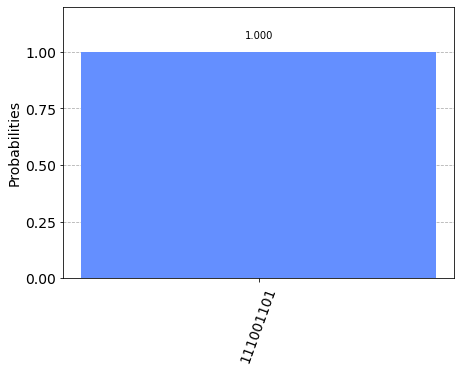

In [47]:
''' Q6:

Code to extract solution

'''
plot_histogram(count)

### Final Remarks: Wrap up your steps, talk briefly about your code and summarize the results and conclusion:  

We constructed the solution space by making a uniform superposition of all the switch qubits and then applied grover's algorithm to maximize the amplitude of the solution. Classically it is cumbersome to list all the possible solutions to be able to start to check them, but here it was only as simple as applying hadamards. Then of course the second advantage which is the most important one is that we made 17 iterations where classically we would have done on average 256 iterations.

The result from the histogram show that the solution is to flip all the switches in the top row, thee rightmost switch in the middle row and all the switches in the bottom row except the middle one.


<h3><center>.........................................................  END .............................................................</center></h3>